<a href="https://colab.research.google.com/github/chandnibusinessanalyst/Airbnb2019-analysis/blob/main/cat_and_dog_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 171MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 92ms/step - loss: 0.6005 - accuracy: 0.6674 - val_loss: 0.5199 - val_accuracy: 0.7396
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.4787 - accuracy: 0.7703 - val_loss: 0.5012 - val_accuracy: 0.7720
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3879 - accuracy: 0.8213 - val_loss: 0.4931 - val_accuracy: 0.7946
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2701 - accuracy: 0.8857 - val_loss: 0.6270 - val_accuracy: 0.7730
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1656 - accuracy: 0.9350 - val_loss: 0.8538 - val_accuracy: 0.7578
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1023 - accuracy: 0.9632 - val_loss: 1.0491 - val_accuracy: 0.7618
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0830 - accuracy: 0.9712 - val_loss: 1.0480 - val_accuracy:

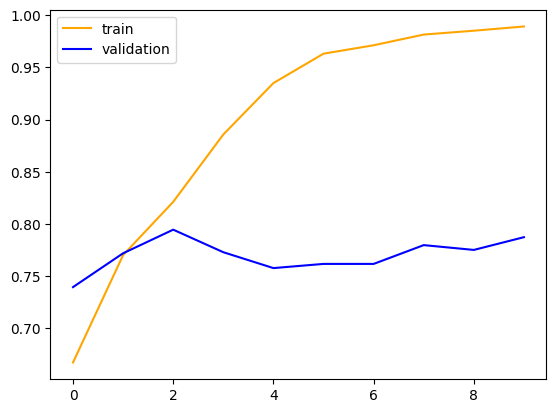

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='orange',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

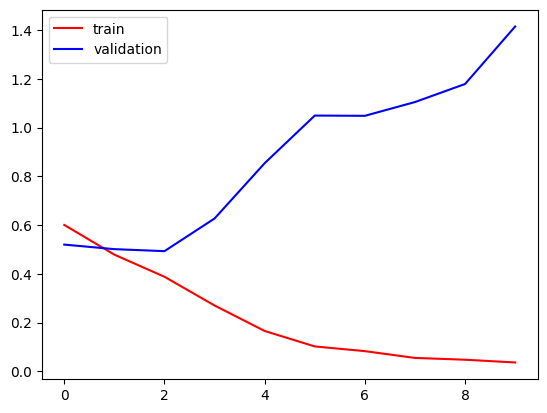

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [19]:
Model: "sequential_2"

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.4662 - accuracy: 0.5824 - val_loss: 0.6596 - val_accuracy: 0.6394
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5795 - accuracy: 0.6957 - val_loss: 0.5582 - val_accuracy: 0.7176
Epoch 3/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4987 - accuracy: 0.7553 - val_loss: 0.5019 - val_accuracy: 0.7580
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4527 - accuracy: 0.7906 - val_loss: 0.4530 - val_accuracy: 0.7934
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3796 - accuracy: 0.8296 - val_loss: 0.4675 - val_accuracy: 0.7868
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3225 - accuracy: 0.8597 - val_loss: 0.4423 - val_accuracy: 0.7890
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2445 - accuracy: 0.9009 - val_loss: 0.4667 - val_ac

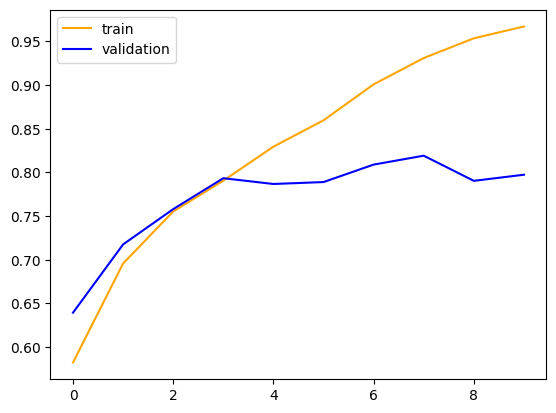

In [22]:
plt.plot(history.history['accuracy'],color='orange',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

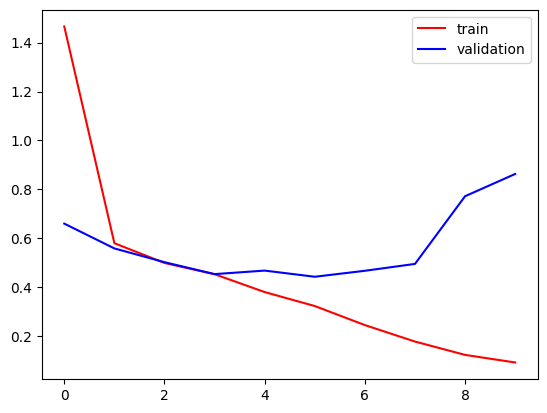

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [48]:
import cv2

In [51]:
test_img = cv2.imread('/content/catt.jpg')

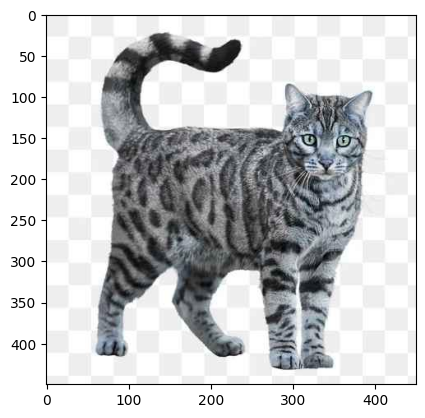

In [52]:
plt.imshow(test_img)

In [53]:
test_img.shape

(450, 450, 3)

In [54]:
test_img = cv2.resize(test_img,(256,256))

In [55]:
test_input = test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.00094287]], dtype=float32)

In [42]:
test_img = cv3.imread('/content/dogg.jpg')

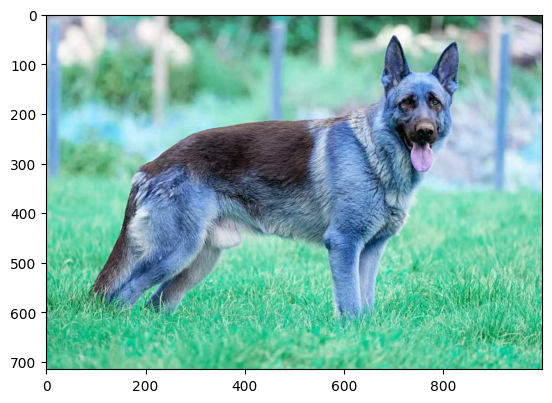

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(715, 1000, 3)

In [45]:
test_img = cv3.resize(test_img,(256,256))

In [46]:
test_input = test_img.reshape((1,256,256,3))

In [47]:
model.predict(test_input)


1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

0 is for cat
1 is for dog


In [57]:
# now its been classified

# New Section